In [2]:
import numpy as np
import os
import pandas as pd
import xgboost as xgb
#from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("https://github.com/michellegarcia2000/p-rotein/blob/main/all_data_Char.csv?raw=true")
data.keys()

Index(['sequence', 'seq_len', 'molecular_weight', 'hydrophobicity',
       'instability_index', 'aromaticity', 'label'],
      dtype='object')

In [12]:
print(data.seq_len.shape)
data.dtypes

(251418,)


sequence              object
seq_len                int64
molecular_weight     float64
hydrophobicity       float64
instability_index    float64
aromaticity          float64
label                float64
dtype: object

In [23]:
X, y = data.iloc[:,1:-1],data.iloc[:,-1]
#print(data.iloc[:,-1])
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [25]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [26]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[12:18:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.257560


In [29]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:21:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.458688,0.000043,0.458682,0.000025
1,0.422243,0.000081,0.422263,0.000063
2,0.390249,0.000153,0.390276,0.000115
3,0.362259,0.000184,0.362274,0.000158
4,0.337908,0.000227,0.337928,0.000196


In [31]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.201947
Name: test-rmse-mean, dtype: float64


In [32]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[12:22:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


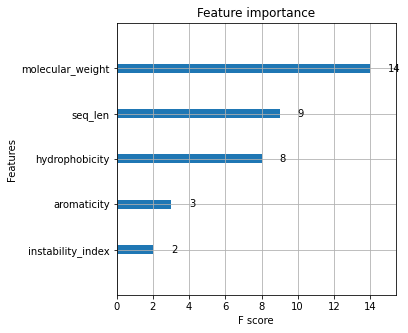

In [38]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()